# Modeling Covid19 rates

Officially published data modeled with a recursive prediction model that is based on previous cases.

As always with reported infections, these are only the tested patients. Many more may occur without ever having seen a physician.

This project was inspired by Romeo Kienzler (IBM).

In [1]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1234)

import tensorflow as tf
tf.random.set_seed(1234)
tf.__version__

'2.2.0-rc1'

## Data Source
European Centre for Disease Prevention and Control (ECDC) [Description of xlsx file](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

In [2]:
today = datetime.date.today()

# always updated list (uncomment if needed)
#url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'+str(today)+'.xlsx'

# file at day of generation
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-24.xlsx'

In [3]:
url

'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-24.xlsx'

In [4]:
df_raw = pd.read_excel(url)

df_raw.head()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
0,2020-03-24,24,3,2020,6,1,Afghanistan,AF
1,2020-03-23,23,3,2020,10,0,Afghanistan,AF
2,2020-03-22,22,3,2020,0,0,Afghanistan,AF
3,2020-03-21,21,3,2020,2,0,Afghanistan,AF
4,2020-03-20,20,3,2020,0,0,Afghanistan,AF


In [5]:
df = df_raw

# let's remove the spaces in the column header
df.rename(columns={"Countries and territories": "Countries"},inplace=True)

# what and how many countries are covered by the ECDC dataset?
pd.DataFrame(df.Countries.unique(), columns = ['Countries'])

,Countries
0,Afghanistan
1,Angola
2,Albania
3,Andorra
4,Argentina
...,...
181,Uzbekistan
182,Venezuela
183,Vietnam
184,Zambia


Which countries are impacted the most?

In [6]:
df.groupby('Countries', as_index=False)['Cases'].sum()

,Countries,Cases
0,Afghanistan,40
1,Albania,100
2,Algeria,189
3,Andorra,133
4,Angola,2
...,...,...
181,Uzbekistan,49
182,Venezuela,84
183,Vietnam,123
184,Zambia,3


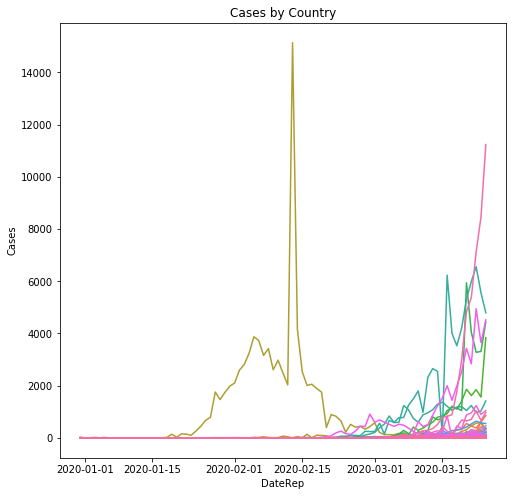

In [7]:
plt.figure(figsize=(8, 8))
plt.title('Cases by Country')

plot = sns.lineplot(x="DateRep", y="Cases",
                    hue="Countries", legend=False, data=df)

## Global cases

In [8]:
# replace date with pandas time for grouping
df['DateRep'] = pd.to_datetime(df['DateRep'])
#dfglobal = df.groupby(df['DateRep'].dt.date).sum()
dfglobal = df.groupby('DateRep', as_index=False)['Cases'].sum()

dfglobal

,DateRep,Cases
0,2019-12-31,27
1,2020-01-01,0
2,2020-01-02,0
3,2020-01-03,17
4,2020-01-04,0
...,...,...
80,2020-03-20,29219
81,2020-03-21,28755
82,2020-03-22,34047
83,2020-03-23,33028


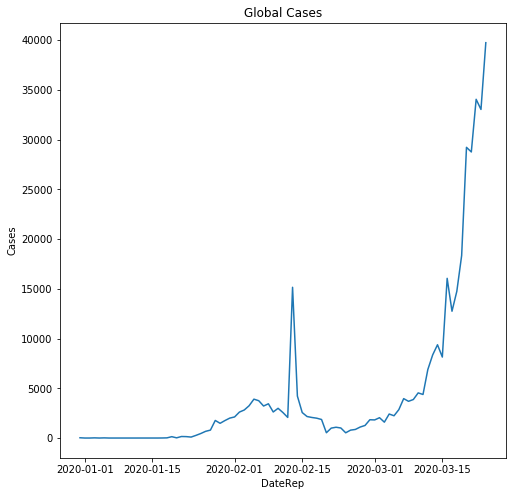

In [9]:
plt.figure(figsize=(8, 8))
plt.title('Global Cases')

plot2 = sns.lineplot(x="DateRep", y="Cases",
                    data=dfglobal)

## Focus on the most impacted countries

In [10]:
# reported above number of cases
threshold = 2000

In [11]:
# get the names of the countries above the threshold
topreports = df[df['Cases']>threshold]
topcountries = topreports.Countries.unique()

topcountries

array(['China', 'France', 'Germany', 'Italy', 'Spain',
       'United_States_of_America'], dtype=object)

In [12]:
# create df only with the selected countries
dftop = df.loc[df['Countries'].isin(topcountries)]

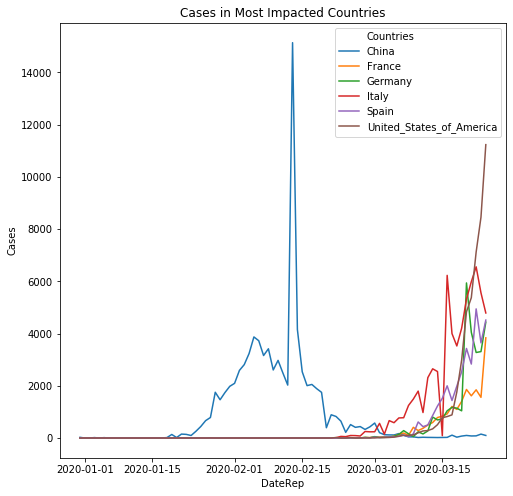

In [13]:
plt.figure(figsize=(8, 8))
plt.title('Cases in Most Impacted Countries')

plot3 = sns.lineplot(x="DateRep", y="Cases",
                    hue="Countries", legend="full", data=dftop)

In [14]:
# create separate dfs for each of the top countries and reset index
dfcn = dftop[dftop['Countries']==topcountries[0]]
dfcn.reset_index(drop=True, inplace=True)

dffr = dftop[dftop['Countries']==topcountries[1]]
dffr.reset_index(drop=True, inplace=True)

dfde = dftop[dftop['Countries']==topcountries[2]]
dfde.reset_index(drop=True, inplace=True)

dfit = dftop[dftop['Countries']==topcountries[3]]
dfit.reset_index(drop=True, inplace=True)

dfes = dftop[dftop['Countries']==topcountries[4]]
dfes.reset_index(drop=True, inplace=True)

dfus = dftop[dftop['Countries']==topcountries[5]]
dfus.reset_index(drop=True, inplace=True)

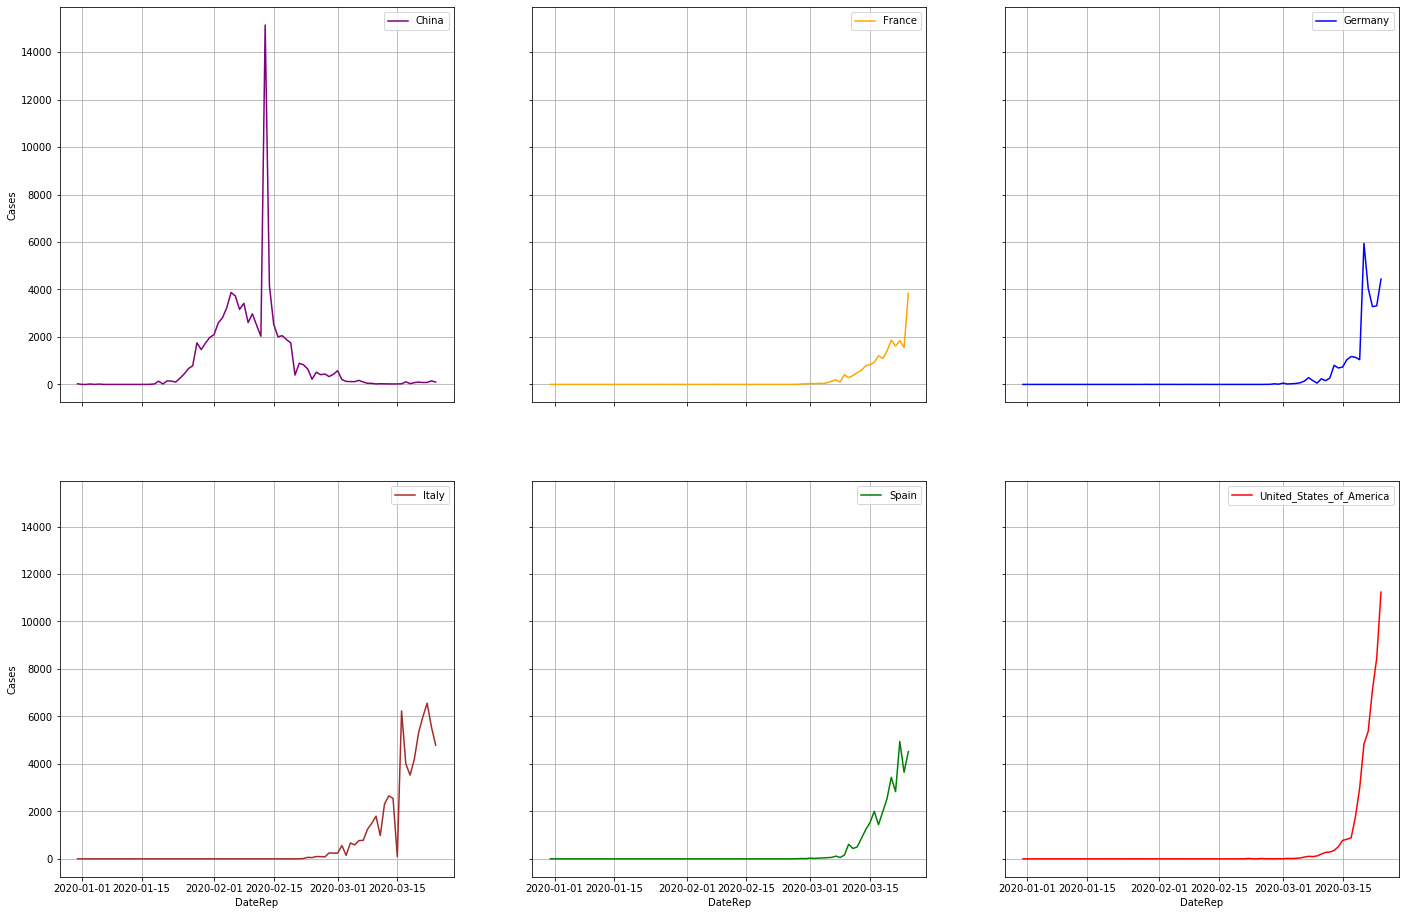

In [15]:
f, axes = plt.subplots(2, 3, figsize=(24, 16), sharex=True, sharey=True)

sns.lineplot(x="DateRep", y="Cases",
            label=dfcn["Countries"].values[0], color="purple", data=dfcn, ax=axes[0, 0]).grid(axis='both')

sns.lineplot(x="DateRep", y="Cases",
            label=dffr["Countries"].values[0], color="orange", data=dffr, ax=axes[0, 1]).grid(axis='both')

sns.lineplot(x="DateRep", y="Cases",
            label=dfde["Countries"].values[0], color="blue", data=dfde, ax=axes[0, 2]).grid(axis='both')

sns.lineplot(x="DateRep", y="Cases",
            label=dfit["Countries"].values[0], color="brown", data=dfit, ax=axes[1, 0]).grid(axis='both')

sns.lineplot(x="DateRep", y="Cases",
             label=dfes["Countries"].values[0], color="green", data=dfes, ax=axes[1, 1]).grid(axis='both')

sns.lineplot(x="DateRep", y="Cases",
            label=dfus["Countries"].values[0], color="red", data=dfus, ax=axes[1, 2]).grid(axis='both')

## Let's focus on the USA as case study

In [16]:
# sort report dates to start with earliest date on top of df
df = dfus.sort_values(by="DateRep")
df.head()

,DateRep,Day,Month,Year,Cases,Deaths,Countries,GeoId
84,2019-12-31,31,12,2019,0,0,United_States_of_America,US
83,2020-01-01,1,1,2020,0,0,United_States_of_America,US
82,2020-01-02,2,1,2020,0,0,United_States_of_America,US
81,2020-01-03,3,1,2020,0,0,United_States_of_America,US
80,2020-01-04,4,1,2020,0,0,United_States_of_America,US


In [17]:
# calculate sequence properties useful for a model 
# shift provides for each row the previous row's value
df["increase_cases"] = df.loc[:,"Cases"] - df.loc[:,"Cases"].shift(1)

df["increase_ratio"] = df.loc[:,"Cases"] / df.loc[:,"Cases"].shift(1)

# number of days in the past predicting the future
window_size = 1

for i in range(1, window_size+1):
    df["cases_" + str(i) + "_days_before"] = df.Cases.shift(i)

for i in range(1, window_size+1):
    df = df[df["cases_" + str(i) + "_days_before"]>0]

# remove all reports with zero cases
df = df[df["Cases"]>0]

df = df.reset_index(drop=True)

df

,DateRep,Day,Month,Year,Cases,Deaths,Countries,GeoId,increase_cases,increase_ratio,cases_1_days_before
0,2020-02-01,1,2,2020,1,0,United_States_of_America,US,0.0,1.000000,1.0
1,2020-02-02,2,2,2020,1,0,United_States_of_America,US,0.0,1.000000,1.0
2,2020-02-03,3,2,2020,3,0,United_States_of_America,US,2.0,3.000000,1.0
3,2020-02-14,14,2,2020,1,0,United_States_of_America,US,0.0,1.000000,1.0
4,2020-02-22,22,2,2020,19,0,United_States_of_America,US,18.0,19.000000,1.0
5,2020-02-28,28,2,2020,1,0,United_States_of_America,US,-5.0,0.166667,6.0
6,2020-02-29,29,2,2020,6,0,United_States_of_America,US,5.0,6.000000,1.0
7,2020-03-01,1,3,2020,3,1,United_States_of_America,US,-3.0,0.500000,6.0
8,2020-03-02,2,3,2020,20,1,United_States_of_America,US,17.0,6.666667,3.0
9,2020-03-03,3,3,2020,14,4,United_States_of_America,US,-6.0,0.700000,20.0


## TensorFlow implementation

In [18]:
@tf.function
def model(x,a,b):
    return (b-(a*x))*x

a = tf.Variable(np.random.randn()*10, trainable=True, dtype=tf.float64)
b = tf.Variable(np.random.randn()*10, trainable=True, dtype=tf.float64)
x = tf.constant(df.cases_1_days_before, dtype=tf.float64)
y = tf.constant(df.Cases, dtype=tf.float64)

variables = [a,b]
optimizer = tf.optimizers.Adam(0.01)

loss_object = tf.keras.losses.MeanAbsoluteError()

with tf.GradientTape(persistent=True) as tape:
    for i in range(10000):
        y_pred = model(x,a,b)
        loss = loss_object(y,y_pred)
        grads = tape.gradient(loss,variables)
        optimizer.apply_gradients(zip(grads,variables))

In [19]:
predictions = []

def recursive_model(i,x):
    if i <= len(df):
        x  = model(x,a,b)
        predictions.append(x)
        i = i+1
        recursive_model(i,x)
recursive_model(1,1)

In [20]:
predictions

[<tf.Tensor: shape=(), dtype=float64, numpy=1.2388051071436454>,
 <tf.Tensor: shape=(), dtype=float64, numpy=1.534440790122907>,
 <tf.Tensor: shape=(), dtype=float64, numpy=1.9003261500150024>,
 <tf.Tensor: shape=(), dtype=float64, numpy=2.3529926603916755>,
 <tf.Tensor: shape=(), dtype=float64, numpy=2.9127760612271754>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.6046460025810005>,
 <tf.Tensor: shape=(), dtype=float64, numpy=4.4591920770980895>,
 <tf.Tensor: shape=(), dtype=float64, numpy=5.5137822080751215>,
 <tf.Tensor: shape=(), dtype=float64, numpy=6.813902705361957>,
 <tf.Tensor: shape=(), dtype=float64, numpy=8.414676329523575>,
 <tf.Tensor: shape=(), dtype=float64, numpy=10.382532116229298>,
 <tf.Tensor: shape=(), dtype=float64, numpy=12.796964055312191>,
 <tf.Tensor: shape=(), dtype=float64, numpy=15.752259353373432>,
 <tf.Tensor: shape=(), dtype=float64, numpy=19.358994473938296>,
 <tf.Tensor: shape=(), dtype=float64, numpy=23.744982349433396>,
 <tf.Tensor: shape=(), dtype

In [21]:
# plot index for x axis
index = np.array(range(len(df)))

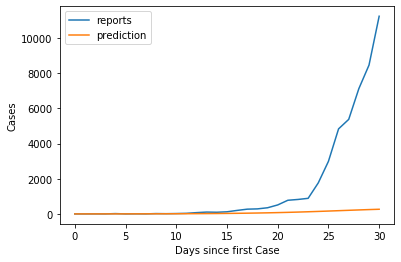

In [22]:
%matplotlib inline

plt.plot(index, df["Cases"], label = "reports")
plt.plot(index, predictions, label = "prediction")
plt.legend()
plt.ylabel('Cases')
plt.xlabel('Days since first Case')
plt.show()